## Data preparation

In [1]:
import cv2
import os
import numpy as np
import glob
import csv
from matplotlib import pyplot as plt
import random
import tensorflow

import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

BASE_PATH = 'GTSRB/Final_Training/Images'
TEST_PATH = 'GTSRB/Final_Test'

/home/tymek/programs/python/ripo/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tymek/programs/python/ripo/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tymek/programs/python/ripo/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tymek/programs/python/ripo/venv

## Functions

In [2]:
def resize():
    counter = 0
    for dirname in os.listdir(BASE_PATH):
        for filename in os.listdir(os.path.join(BASE_PATH, dirname)):
            if filename.endswith(".ppm"):
                image_path = os.path.join(BASE_PATH, dirname, filename)
                im = cv2.imread(image_path)
                resized_im = cv2.resize(im, (32, 32))
                cv2.imwrite(image_path, resized_im)

In [3]:
def sanity_check():
    counter = 0
    for dirname in os.listdir(BASE_PATH):
        for filename in os.listdir(os.path.join(BASE_PATH, dirname)):
            if filename.endswith(".ppm"):
                image_path = os.path.join(BASE_PATH, dirname, filename)
                im = cv2.imread(image_path)
                if im.shape != (32, 32, 3):
                    counter += 1
    print(counter)

In [25]:
def load_dataset():
    filelist = glob.glob(f'{BASE_PATH}/*/*.ppm')
    testlist = glob.glob(f'{TEST_PATH}/Images/*.ppm')
    X_train = np.array( [np.array(cv2.normalize(cv2.imread(fname), None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)) for fname in filelist] )
    X_test = np.array([np.array( cv2.imread(fname) ) for fname in testlist])

    Y_train = np.array([np.zeros(43) for fname in filelist])
    for i,fname in enumerate(filelist):
        Y_train[i][int(fname.split('/')[3])]=1

    with open(f'{TEST_PATH}/GT-final_test.csv') as csvfile:
        spamreader = csv.reader(csvfile,delimiter=';')
        data = list(spamreader)
        data.pop(0)

    Y_test = np.array([np.zeros(43) for fname in testlist])
    for i,fname in enumerate(testlist):
        image_name = fname.split('/')[3]
        image_number = int(image_name.split('.')[0])
        classid = int(data[image_number][7])
        Y_test[i][classid]=1

    return X_train, Y_train, X_test, Y_test

In [26]:
def show_image(index, X, Y):
    plt.imshow(cv2.cvtColor(X[index],cv2.COLOR_BGR2RGB).astype('float32'))
    plt.show()
    print('Belongs to class nr: ' + str(int(np.where(Y[index]==1)[0])))

[[[0.41025642 0.49743593 0.574359  ]
  [0.3846154  0.49230772 0.574359  ]
  [0.4        0.51282054 0.5948718 ]
  ...
  [0.3897436  0.35384616 0.2871795 ]
  [0.43589747 0.4        0.35384616]
  [0.4717949  0.43589747 0.36410257]]

 [[0.2769231  0.42564106 0.574359  ]
  [0.2769231  0.42564106 0.5794872 ]
  [0.2923077  0.45128208 0.6051282 ]
  ...
  [0.2871795  0.2769231  0.23076925]
  [0.31282052 0.2923077  0.22051284]
  [0.35897437 0.34871796 0.3025641 ]]

 [[0.3025641  0.44615388 0.5641026 ]
  [0.30769232 0.44102567 0.5538462 ]
  [0.33846155 0.4769231  0.53333336]
  ...
  [0.1794872  0.19487181 0.13333333]
  [0.15897435 0.174359   0.11282051]
  [0.1794872  0.19487181 0.13846153]]

 ...

 [[0.07179487 0.0974359  0.05641026]
  [0.08205128 0.10769231 0.07692308]
  [0.10769231 0.12307692 0.08205128]
  ...
  [0.04102564 0.05128206 0.03589743]
  [0.04615384 0.05128206 0.04102564]
  [0.04102564 0.04615384 0.03589743]]

 [[0.08205128 0.0974359  0.06153847]
  [0.08717949 0.11282051 0.09230769]


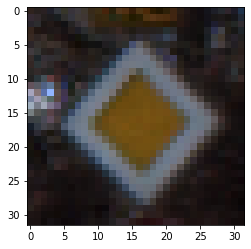

Belongs to class nr: 12


In [27]:
X_train, Y_train, X_test, Y_test = load_dataset()
print(X_train[0])
show_image(random.randint(0,12629),X_train, Y_train)